<a href="https://colab.research.google.com/github/Omarouteix/PUC/blob/main/exoscoursolivia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exos cours**

# Premier cours


# Exo1

In [1]:
import pandas as pd
df = pd.read_csv('/content/penguins.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/penguins.csv'

In [ ]:
import seaborn as sns
dt= sns.load_dataset('penguins')

In [ ]:
df_num = df.select_dtypes(include='number')
df_num.loc[df_num['bill_length_mm'].isna()==True]


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


In [ ]:
df_num = df.select_dtypes(include='number')
df_num.loc[df_num['bill_depth_mm'].isna()==True]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


In [ ]:
df_num = df.select_dtypes(include='number')
df_num.loc[df_num['flipper_length_mm'].isna()==True]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


In [ ]:
df_num1= df_num.dropna()
df_num1.loc[df_num['bill_depth_mm'].isna()==True]

NameError: name 'df_num' is not defined

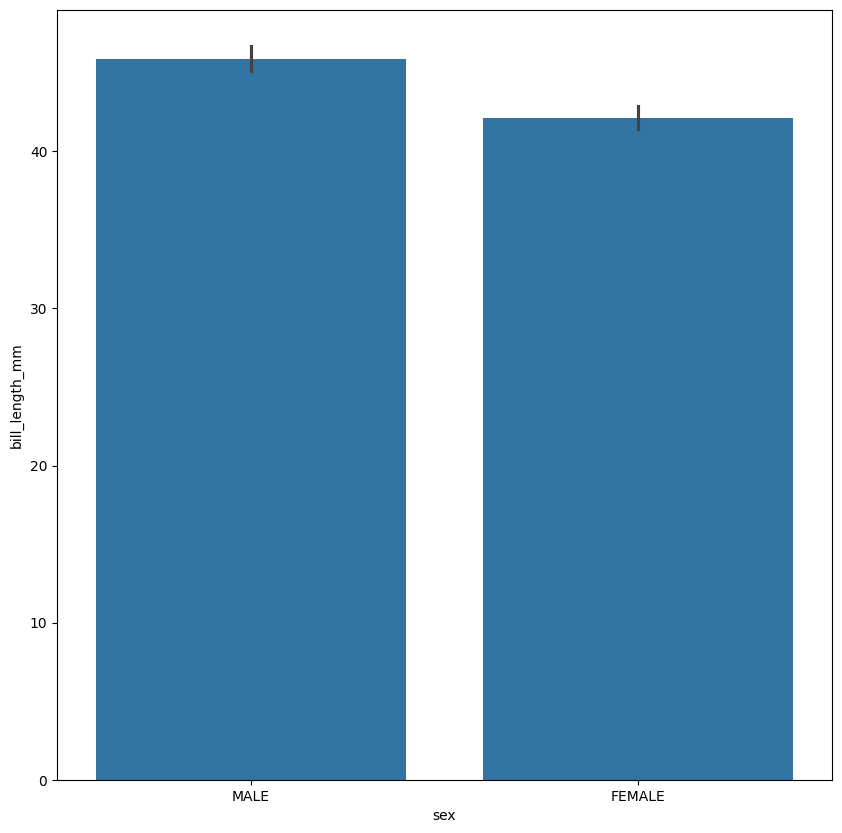

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = sns.barplot(x="sex", y="bill_length_mm", data=df)
plt.show()
plt.savefig('penguins.png')

# **Exo2**
---


<Figure size 1200x1200 with 0 Axes>

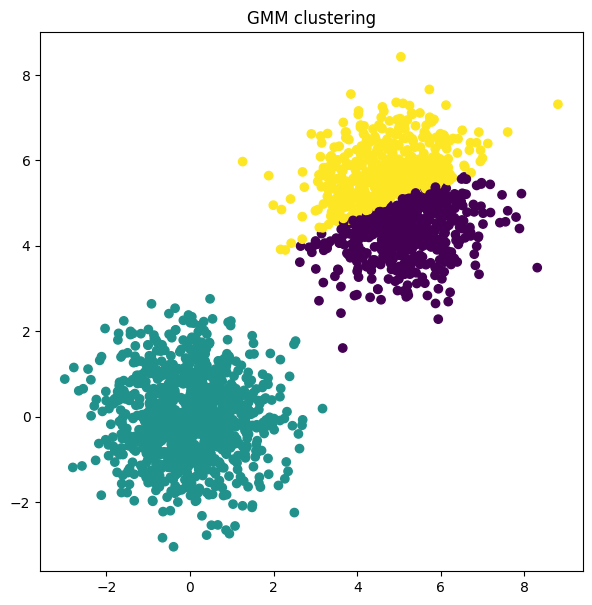

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

plt.figure(figsize=(12, 12))

n_samples = 2000
centers = [(0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=3,random_state=0)
gmm = mixture.GaussianMixture(n_components=4,covariance_type='full')

plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("GMM clustering")
plt.show()

# Exo3

-load pengins data


-remove NaNs

-keep 4 num features (no sex no island) x

-clase=species y

-split train/test

-ajustar 4 modelos:

  KNN

  Gaussian N Bayes

  trees

  QDA

report all the confesion matrix


-classification report

In [ ]:
import seaborn as sns
df= sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
X = df_num1# matriz de datos
y = df['species'].values

In [ ]:
df_num = df.select_dtypes(include='number')
df_num1= df_num.dropna()
df_num1.loc[df_num['bill_depth_mm'].isna()==True]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g


In [ ]:
np.unique(y)

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
import seaborn as sns
import pandas as pd # Import pandas for DataFrame manipulation
import numpy as np
from sklearn.model_selection import train_test_split

df = sns.load_dataset('penguins')

# Ensure X and y are derived from the same DataFrame after filtering
df_num = df.select_dtypes(include='number')
df_filtered = df.dropna(subset=df_num.columns)  # Drop rows with NaNs in numerical columns

X = df_filtered[df_num.columns]  # Use filtered DataFrame for X
y = df_filtered['species'].values

# Now X and y should have consistent shapes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Número de observaciones del conjunto de entrenamiento es {}'.format(X_train.shape[0]))
print('Número de observaciones del conjunto de test es {}'.format(X_test.shape[0]))

Número de observaciones del conjunto de entrenamiento es 229
Número de observaciones del conjunto de test es 113


**KNN**




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
xnew = X_test.iloc[0].values.reshape(1,-1)
true_label = y_test[0]
predicted_label = knn.predict(xnew)
print('Observación a predecir es {}'.format(*xnew))
print('la clase real a la que pertenece es {}'.format(true_label))
print('la clase que predice el algoritmo KNN que hemos entrenado es {}'.format(predicted_label))

Observación a predecir es [  46.2   14.5  209.  4800. ]
la clase real a la que pertenece es Gentoo
la clase que predice el algoritmo KNN que hemos entrenado es ['Gentoo']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

y_knn_pred = knn.predict(X_test)
confusion_matrix(y_test, y_knn_pred)

array([[46,  6,  2],
       [12,  7,  1],
       [ 1,  0, 38]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

      Adelie       0.78      0.85      0.81        54
   Chinstrap       0.54      0.35      0.42        20
      Gentoo       0.93      0.97      0.95        39

    accuracy                           0.81       113
   macro avg       0.75      0.73      0.73       113
weighted avg       0.79      0.81      0.79       113



**NAIVE** **BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_NB_pred)

array([[50,  4,  0],
       [ 2, 18,  0],
       [ 0,  0, 39]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_NB_pred))

              precision    recall  f1-score   support

      Adelie       0.96      0.93      0.94        54
   Chinstrap       0.82      0.90      0.86        20
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.95       113
   macro avg       0.93      0.94      0.93       113
weighted avg       0.95      0.95      0.95       113



**Decision tree**

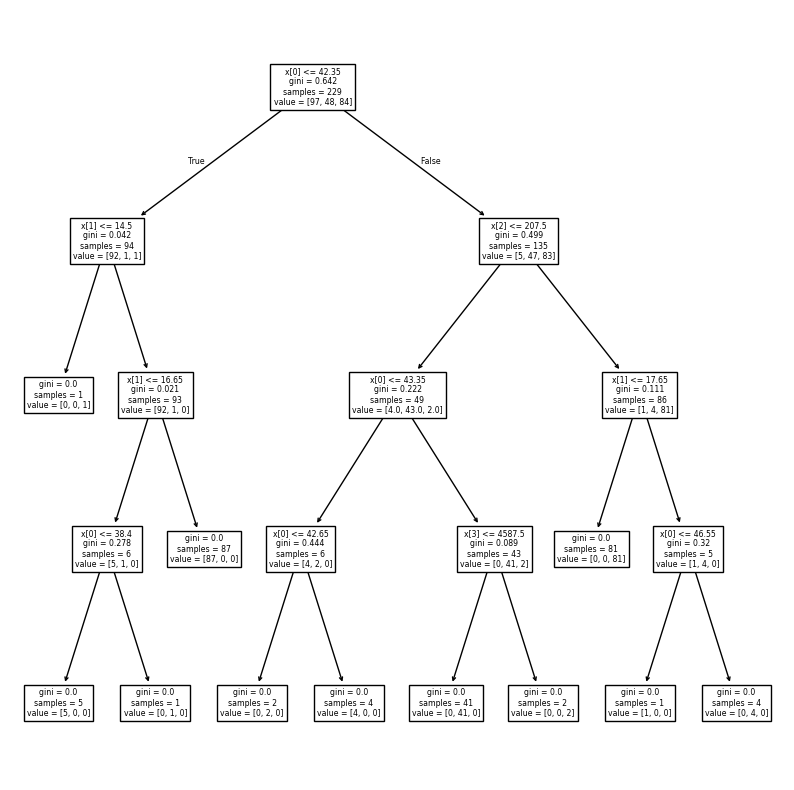

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plot_tree(dt)
plt.show()

In [ ]:
y_DT_pred = dt.predict(X_test)

confusion_matrix(y_test, y_DT_pred)

array([[49,  4,  1],
       [ 1, 19,  0],
       [ 0,  1, 38]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.91      0.94        54
   Chinstrap       0.79      0.95      0.86        20
      Gentoo       0.97      0.97      0.97        39

    accuracy                           0.94       113
   macro avg       0.92      0.94      0.93       113
weighted avg       0.94      0.94      0.94       113



**QDA**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

clf = QuadraticDiscriminantAnalysis()

clf.fit(X_train, y_train) # X has 4 features
QuadraticDiscriminantAnalysis()

y_pred = clf.predict(X_test)


confusion_matrix(y_test,y_pred)

array([[53,  1,  0],
       [ 0, 20,  0],
       [ 0,  0, 39]])

Classification Report:
Segun las matrices de confusion, QDA es el mejor modelo seguido de Naive Bayes

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        54
   Chinstrap       0.95      1.00      0.98        20
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.99       113
   macro avg       0.98      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113

